In [ ]:
pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 32.1 MB/s 
     |████████████████████████████████| 140 kB 60.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "3166b3814b57443db0c9b180f0778cb7"
client_secret = 'ec43ef646f164e0eab5b51fa27241fc2'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#get the playlist 
playlist = sp.user_playlist_tracks('31v37jdlart77jfsnukd3s7wc7oq', '26toVviUzM236kwFNlPX8I')['items']
id_test = playlist[0]['track']['id']

#get df length
len_df = len(playlist)

#get columns names
columns = ['artist', 'track']
columnsName = list(sp.audio_features(id_test)[0].keys())
columns.extend(columnsName)

#create a data frame for the playlist
playlist_tracks = pd.DataFrame(columns = columns, index = range(0, len_df))

In [43]:
#create a data frame for my playlist
playlist_ids = ['26toVviUzM236kwFNlPX8I']
#'37i9dQZF1DWVOaOWiVD1Lf'
row_counter = 0

for playlist_id in playlist_ids:
  for track in sp.user_playlist_tracks('31v37jdlart77jfsnukd3s7wc7oq',playlist_id)['items']:
      current_id = track['track']['id']
      current_row = [track['track']['artists'][0]['name'], track['track']['name']]
      #print(current_row)
      row_values = list(sp.audio_features(current_id)[0].values())
      current_row.extend(row_values)
      playlist_tracks.iloc[row_counter] = current_row
      row_counter += 1
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Jessi,ZOOM,0.874,0.6,6,-6.064,1,0.158,0.00942,0,0.126,0.457,100.012,audio_features,4IaxDf2FixiQXq0mW7key9,spotify:track:4IaxDf2FixiQXq0mW7key9,https://api.spotify.com/v1/tracks/4IaxDf2FixiQ...,https://api.spotify.com/v1/audio-analysis/4Iax...,174840,4
1,Charlie Puth,How Long,0.845,0.561,1,-5.253,0,0.0778,0.211,0.000003,0.0383,0.811,109.974,audio_features,6wmAHw1szh5RCKSRjiXhPe,spotify:track:6wmAHw1szh5RCKSRjiXhPe,https://api.spotify.com/v1/tracks/6wmAHw1szh5R...,https://api.spotify.com/v1/audio-analysis/6wmA...,200853,4
2,Bruno Mars,Marry You,0.621,0.82,10,-4.865,1,0.0367,0.332,0,0.104,0.452,144.905,audio_features,22PMfvdz35fFKYnJyMn077,spotify:track:22PMfvdz35fFKYnJyMn077,https://api.spotify.com/v1/tracks/22PMfvdz35fF...,https://api.spotify.com/v1/audio-analysis/22PM...,230192,4
3,Charlie Puth,Charlie Be Quiet!,0.753,0.662,8,-4.25,1,0.0702,0.205,0.000004,0.0851,0.466,94.958,audio_features,3E9es0SK2EusrHA7IaO7Zu,spotify:track:3E9es0SK2EusrHA7IaO7Zu,https://api.spotify.com/v1/tracks/3E9es0SK2Eus...,https://api.spotify.com/v1/audio-analysis/3E9e...,128364,4
4,Charlie Puth,Loser,0.698,0.623,8,-7.845,0,0.037,0.623,0.0856,0.179,0.625,102.002,audio_features,1BCXUbnU0486n4eeTyyVIj,spotify:track:1BCXUbnU0486n4eeTyyVIj,https://api.spotify.com/v1/tracks/1BCXUbnU0486...,https://api.spotify.com/v1/audio-analysis/1BCX...,204376,4


In [44]:
# drop irrelevant features
playlist_tracks.drop(['type', 'id', 'uri', 'track_href', 'analysis_url','duration_ms'], axis = 1, inplace = True)
playlist_tracks = playlist_tracks.astype({'danceability': float,
                                        'energy': float,
                                        'key': int,
                                        'loudness': float,
                                        'mode': int,
                                        'speechiness': float,
                                        'acousticness': float,
                                        'instrumentalness': float,
                                        'liveness': float,
                                        'valence': float,
                                        'tempo': float,
                                        'time_signature': float})

In [45]:
playlist_tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.556160,0.446640,5.220000,-13.292330,0.650000,0.071698,0.544507,0.405387,0.144103,0.482051,113.921910,3.860000
std,0.197092,0.276175,3.549306,9.154635,0.479372,0.057295,0.384200,0.436536,0.100799,0.287357,32.854301,0.471833
min,0.124000,0.004030,0.000000,-33.708000,0.000000,0.027800,0.006140,0.000000,0.038300,0.036400,57.888000,1.000000
25%,0.407750,0.151250,1.000000,-21.789750,0.000000,0.039225,0.151250,0.000000,0.090400,0.230000,91.063500,4.000000
50%,0.586000,0.494500,5.500000,-9.469000,1.000000,0.047350,0.558500,0.051850,0.107000,0.472500,108.430000,4.000000
75%,0.714000,0.663250,8.000000,-5.893250,1.000000,0.078825,0.983250,0.892250,0.150500,0.728250,131.579750,4.000000
max,0.981000,0.909000,11.000000,-2.595000,1.000000,0.306000,0.996000,0.959000,0.593000,0.956000,208.038000,5.000000


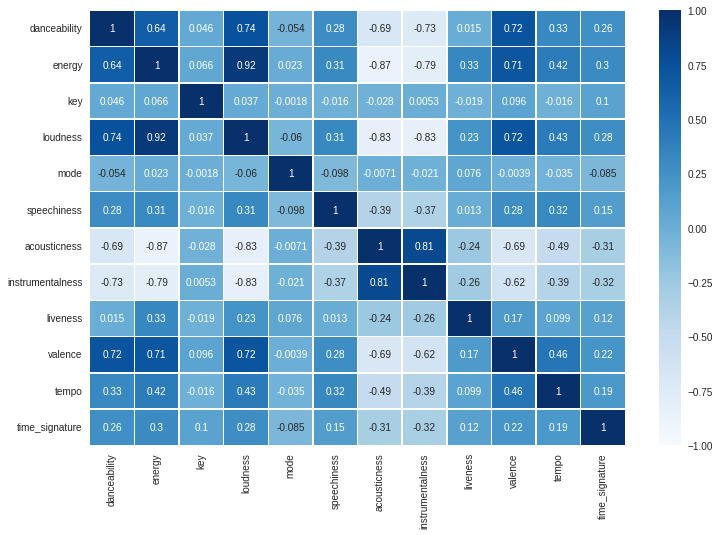

In [46]:
#see the correlation between figures
#there are no correlation between figures, except for energy and loudness => which make sense
plt.figure(figsize = (12,8))
sns.heatmap(playlist_tracks.drop(['artist', 'track'], axis = 1).corr(), vmin = -1, vmax = 1, annot = True, cmap = "Blues", lw = .5, linecolor = 'white')



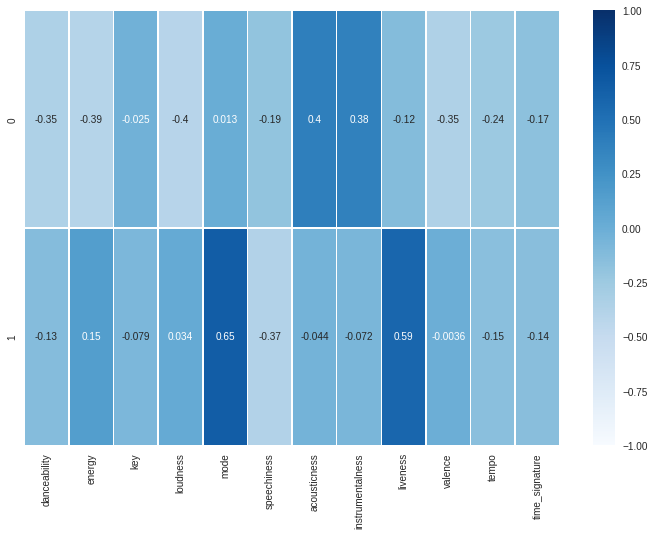

In [47]:
# scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(playlist_tracks.drop(['artist', 'track'], axis = 1))
scaled_data = scaler.transform(playlist_tracks.drop(['artist', 'track'], axis = 1))

# reduce dimensions using PCA - 2 PCs
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

# plot the correlation between PC's and features
pca_corr = pd.DataFrame(pca.components_, columns = playlist_tracks.drop(['artist', 'track'], axis = 1).columns)

plt.figure(figsize = (12,8))
sns.heatmap(pca_corr, cmap = "Blues", vmin = -1, vmax = 1, annot = True, lw = .5, linecolor = 'white')

Text(0, 0.5, 'PC2: 0.10')

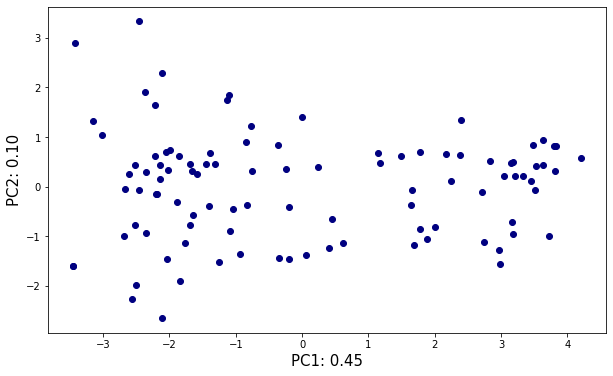

In [ ]:
# plot each data point on 2-dimensional 
plt.figure(figsize = (10, 6))
plt.scatter(data_pca[:,0], data_pca[:,1], c = 'navy')
plt.xlabel('PC1: {:.2f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.2f}'.format(pca.explained_variance_ratio_[1]), size = 15)

Text(0, 0.5, 'Ratio of Variance Explained')

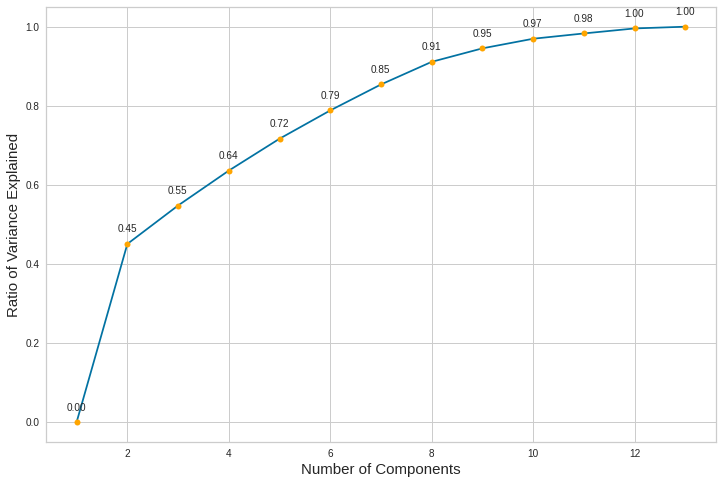

In [48]:
# find the number of clusters using Elbow Method
exp_var_ratio = []

for n in range(0,13):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    exp_var_ratio.append(sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.plot(range(1,14), exp_var_ratio, marker = 'o', markerfacecolor = 'orange', markersize = 6)
for i,j in zip(range(1,14),exp_var_ratio):
    ax.annotate('{:.2f}'.format(j),xy=(i-.2,j+.03))
plt.xlabel('Number of Components', size = 15)
plt.ylabel('Ratio of Variance Explained', size = 15)

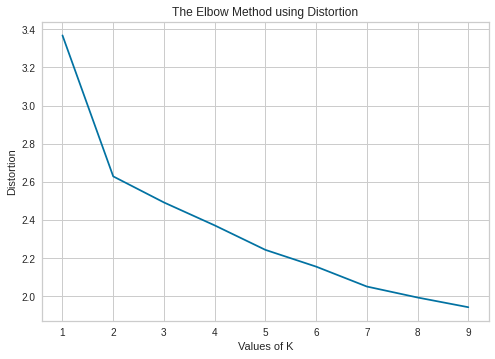

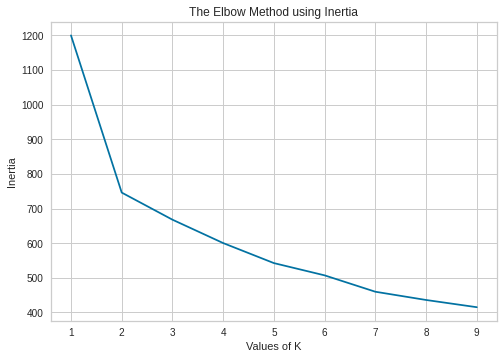

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = scaled_data
X.shape[0]
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


Text(0, 0.5, 'PC2: 0.10')

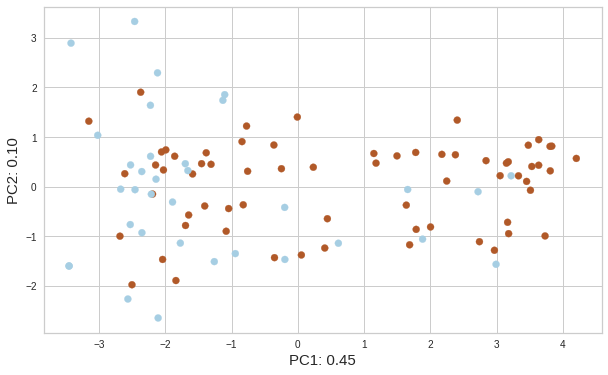

In [49]:
# appky k means clustrer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(playlist_tracks.drop(['artist', 'track'], axis = 1))

# plot the 2 clusters
plt.figure(figsize = (10, 6))
plt.scatter(data_pca[:,0], data_pca[:,1], c = list(kmeans.labels_), cmap = 'Paired')
plt.xlabel('PC1: {:.2f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.2f}'.format(pca.explained_variance_ratio_[1]), size = 15)


In [56]:
# show which group a song belongs to on the dataframe
playlist_tracks['group'] = list(kmeans.labels_)
playlist_tracks = playlist_tracks.astype({'group': str})
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,group
0,Jessi,ZOOM,0.874,0.600,6,-6.064,1,0.1580,0.00942,0.000000,0.1260,0.457,100.012,4.0,1
1,Charlie Puth,How Long,0.845,0.561,1,-5.253,0,0.0778,0.21100,0.000003,0.0383,0.811,109.974,4.0,1
2,Bruno Mars,Marry You,0.621,0.820,10,-4.865,1,0.0367,0.33200,0.000000,0.1040,0.452,144.905,4.0,0
3,Charlie Puth,Charlie Be Quiet!,0.753,0.662,8,-4.250,1,0.0702,0.20500,0.000004,0.0851,0.466,94.958,4.0,1
4,Charlie Puth,Loser,0.698,0.623,8,-7.845,0,0.0370,0.62300,0.085600,0.1790,0.625,102.002,4.0,1


In [58]:
# get the mean of each feature of each group
means = pd.DataFrame(index = range(2), 
                    columns = list(playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean'].index))
means.iloc[0] = playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean']
means.iloc[1] = playlist_tracks[playlist_tracks['group'] == '1'].describe().loc['mean']
means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.601294,0.569932,4.911765,-9.743735,0.676471,0.091324,0.330735,0.245465,0.161288,0.609406,150.597588,3.970588
1,0.532909,0.383126,5.378788,-15.120394,0.636364,0.061588,0.654631,0.48777,0.13525,0.416444,95.028379,3.80303


[1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


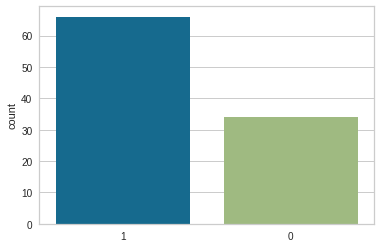

In [63]:
# the number of songs in each group
group0 = playlist_tracks[playlist_tracks['group'] == '0']
group1 = playlist_tracks[playlist_tracks['group'] == '1']

sns.countplot([str(group) for group in kmeans.labels_])

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff9dd8e55d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff9e6a4e950>)

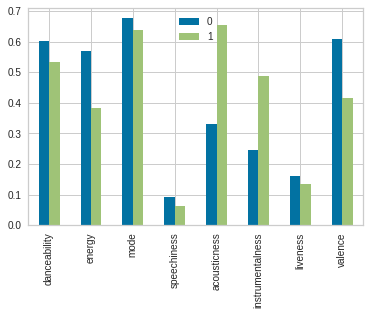

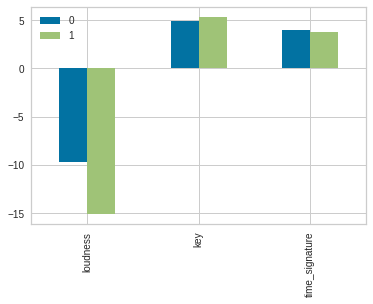

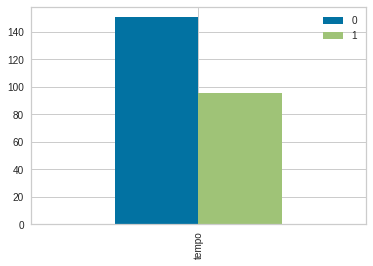

In [53]:
# plot the features of 2 groups in comparison
# it appears that group1's songs have more energy and danceability with more speechiness => pop songs
# while group 2's songs have more acousticness and have lower tempo => chopin
p1 = means.drop(['tempo','loudness','key','time_signature'],axis=1).T.plot(kind='bar')
p2 = means[['loudness','key','time_signature']].T.plot(kind='bar')
p3 = means[['tempo']].T.plot(kind='bar')
p1, p2, p3